# Titanic

### 1. Preparação de Dados I

In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [395]:
# import warnings
# warnings.filterwarnings('ignore')

In [396]:
titanic =  pd.read_csv("./titanicDB/train.csv")

In [397]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Removendo dados desnecessários
O nome das pessoas e o ID normalmente não são necessários para a atividade que será realizada. 

O número do ticket e valor do ticket também não agrega valor na predição

A coluna "Cabin" continha muita informação nula para agregar qualquer valor

In [398]:
titanic.drop(["Name","Ticket","Fare","PassengerId","Cabin"],axis=1,inplace=True)

In [399]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [400]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


### Análise exploratória

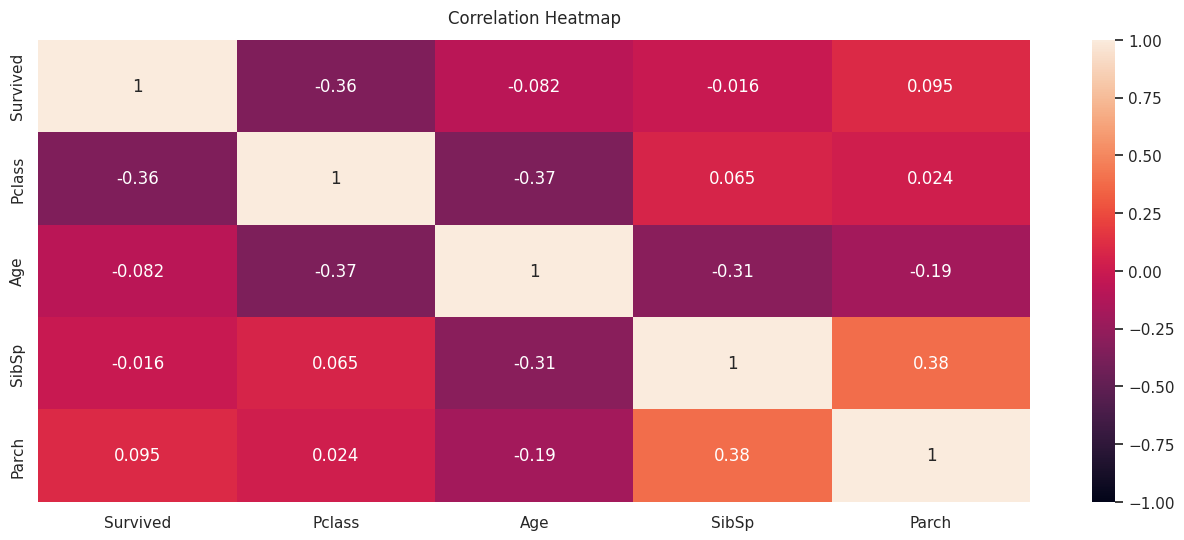

In [401]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap((titanic.dropna()).corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Explorando os dados 

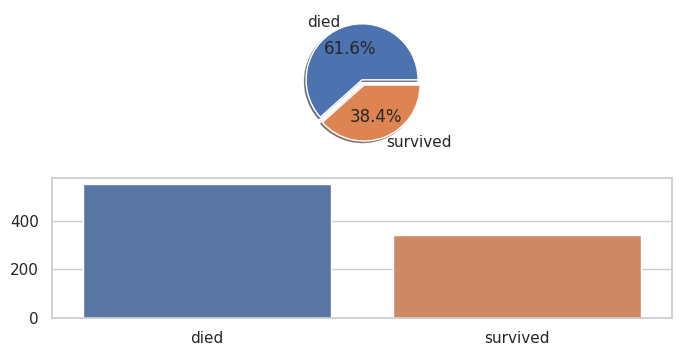

In [402]:
f,ax=plt.subplots(2,figsize=(8,4))
titanic['Survived'].replace({0:"died",1:"survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = titanic["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

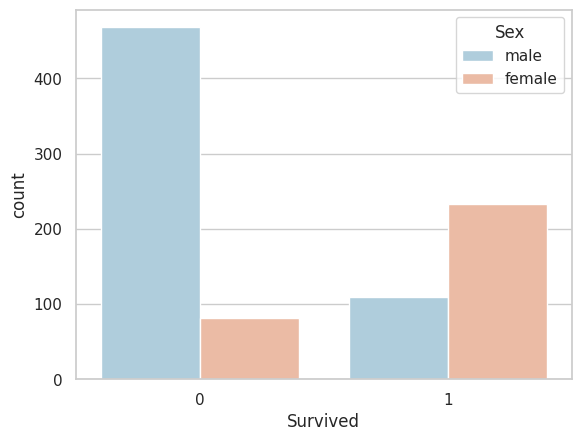

In [403]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='RdBu_r')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

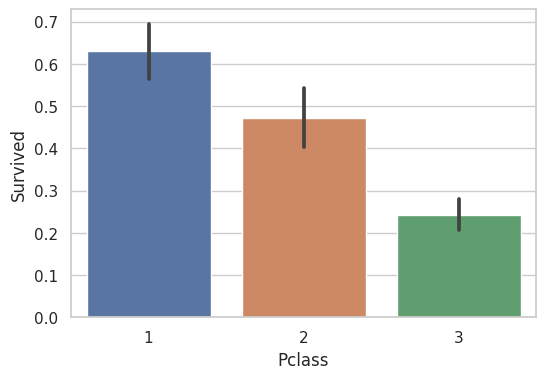

In [404]:
plt.figure(figsize = (6,4))
sns.barplot(data = titanic , x = "Pclass" , y = "Survived")

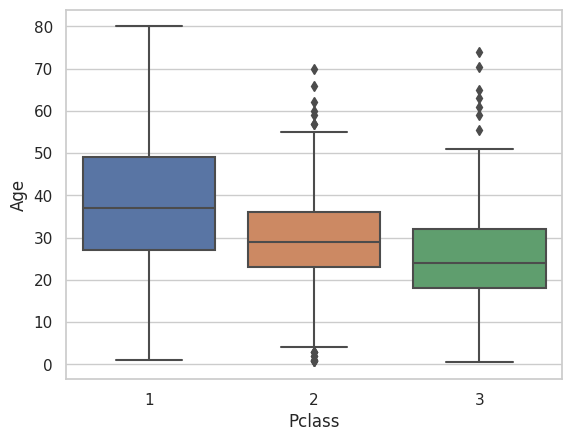

In [405]:
sns.set(style="whitegrid")
ax = sns.boxplot(x='Pclass', y='Age', data=titanic)

### Substituindo valores nulos da idade

In [406]:
# média da idade baseada no gênero e pclass = 1
p1m= titanic[(titanic["Pclass"]==1) & (titanic["Sex"]=="male")].mean(numeric_only = True)
p1f= titanic[(titanic["Pclass"]==1) & (titanic["Sex"]=="female")].mean(numeric_only = True)
# média da idade baseada no gênero e pclass = 2
p2m= titanic[(titanic["Pclass"]==2) & (titanic["Sex"]=="male")].mean(numeric_only = True)
p2f= titanic[(titanic["Pclass"]==2) & (titanic["Sex"]=="female")].mean(numeric_only = True)
# média da idade baseada no gênero e pclass = 3
p3m= titanic[(titanic["Pclass"]==3) & (titanic["Sex"]=="male")].mean(numeric_only = True)
p3f= titanic[(titanic["Pclass"]==3) & (titanic["Sex"]=="female")].mean(numeric_only = True)

Média das idades com base na classe seguindo o padrão:

(numero da pclass)(letra inicial do sexo): (valor da média)

In [407]:
print(f'p1m: {int(p1m["Age"])}, p1f: {int(p1f["Age"])}\np2m: {int(p2m["Age"])}, p2f: {int(p2f["Age"])}\np3m: {int(p3m["Age"])}, p3f: {int(p3f["Age"])}')

p1m: 41, p1f: 34
p2m: 30, p2f: 28
p3m: 26, p3f: 21


In [408]:
titanic["Age"].fillna(0,inplace = True)#substituir o valor de nan pra 0
for i in range(len(titanic)):
    #Substituindo os valores nulos das idades baseados em pclass 1
    if((titanic["Pclass"][i] == 1) & (titanic["Sex"][i] == "male") & (titanic["Age"][i] == 0)):
        titanic["Age"][i] = int(p1m["Age"])
    if((titanic["Pclass"][i] == 1) & (titanic["Sex"][i] == "female") & (titanic["Age"][i] == 0)):
        titanic["Age"][i]= int(p1f["Age"])
        
    #Substituindo os valores nulos das idades baseados em pclass 2
    if((titanic["Pclass"][i] == 2) & (titanic["Sex"][i] == "male") & (titanic["Age"][i] == 0)):
        titanic["Age"][i]= int(p2m["Age"])
    if((titanic["Pclass"][i] == 2) & (titanic["Sex"][i] == "female") & (titanic["Age"][i] == 0)):
        titanic["Age"][i]= int(p2f["Age"])
        
    #Substituindo os valores nulos das idades baseados em pclass 3  
    if((titanic["Pclass"][i] == 3) & (titanic["Sex"][i] == "male") & (titanic["Age"][i] == 0)):
        titanic["Age"][i]= int(p3m["Age"])
    if((titanic["Pclass"][i] == 3) & (titanic["Sex"][i] == "female") & (titanic["Age"][i] == 0)):
        titanic["Age"][i]= int(p3f["Age"])

In [409]:
titanic["Age"].value_counts()

26.00    112
21.00     66
30.00     34
24.00     30
22.00     27
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [410]:
# for i in range(len(titanic)):
#     print(f'pclass: {titanic["Pclass"][i]} sex: {titanic["Sex"][i]} age: {titanic["Age"][i]}')

# Substituindo colunas litereais por valores numericos

Sex: male = 1, Female = 0

Embarked: C = 0, Q = 1, S = 2

In [411]:
titanic["Embarked"].dropna(inplace=True) # uma unica linha de Embarkd estava com o valor nulo

In [412]:
le = LabelEncoder()
titanic['Sex']= le.fit_transform(titanic['Sex'])
titanic['Embarked']= le.fit_transform(titanic['Embarked'])

In [414]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [415]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(["Survived"],axis=1), titanic.Survived, test_size=0.30, random_state=42)

## Normalização dos dados

In [421]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [422]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,-1.637881,0.720772,-1.864880,-0.474161,1.998853,0.566508
1,0.803267,0.720772,-0.210607,-0.474161,-0.479327,0.566508
2,0.803267,-1.387401,-2.090462,0.348687,0.759763,0.566508
3,-0.417307,0.720772,0.541336,0.348687,1.998853,0.566508
4,-0.417307,0.720772,1.067695,0.348687,0.759763,0.566508


# Aplicando KNN